In [2]:
%load_ext autoreload
import os,sys
import pandas as pd
import seaborn as sns
import numpy as np
import progressbar
import dill as pickle
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
sys.path.append("../")

print(sys.path)

%autoreload 2
from src.pySRM.pysrm.regions import SpectraRegion, ProteinWeights
from src.pySRM.pysrm.imzml import IMZMLExtract
from src.pySRM.pysrm.comparative import CombinedSpectra



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
['/mnt/f/dev/git/pyIMS/examples', '/usr/lib/python38.zip', '/usr/lib/python3.8', '/usr/lib/python3.8/lib-dynload', '', '/usr/local/lib/python3.8/dist-packages', '/usr/local/lib/python3.8/dist-packages/mpld3-0.3.1.dev1-py3.8.egg', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.8/dist-packages/IPython/extensions', '/home/mjoppich/.ipython', '../', '../']


Load an imzML file

In [3]:
imze = IMZMLExtract("/mnt/d/dev/data/msi/slideD/181114_AT1_Slide_D_Proteins.imzML")

Opening regions file for /mnt/d/dev/data/msi/slideD/181114_AT1_Slide_D_Proteins.imzML


Explore which regions are there?

0 ((356, 400, 215, 273), 2655)
1 ((436, 478, 632, 687), 2408)
2 ((1572, 1612, 608, 666), 2419)
3 ((1149, 1197, 142, 205), 3136)
4 ((618, 666, 211, 266), 2744)
5 ((633, 684, 630, 688), 3068)
6 ((1357, 1400, 628, 686), 2596)


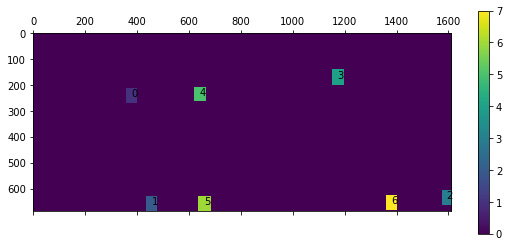

{0: ((356, 400, 215, 273), 2655),
 1: ((436, 478, 632, 687), 2408),
 2: ((1572, 1612, 608, 666), 2419),
 3: ((1149, 1197, 142, 205), 3136),
 4: ((618, 666, 211, 266), 2744),
 5: ((633, 684, 630, 688), 3068),
 6: ((1357, 1400, 628, 686), 2596)}

In [5]:
imze.list_regions()

Start with prozessing the first region , region 0

In [6]:
spectra_orig = imze.get_region_array(0, makeNullLine=True)
spectra_intra = imze.normalize_region_array(spectra_orig, normalize="intra_median")
spectra = imze.normalize_region_array(spectra_intra, normalize="inter_median")

Found region 0 with shape (45, 59, 17900)
Got 2655 median-enabled pixels
Got a total of 47524500 fold changes
Median elements [23762250]
Median elements
Global Median 0.96164


Where are the highest peaks? This may give a hint on whether or not a normalization by max intensity would also have worked. => here: most probably yes!

3454.87441091502 39
3456.383544128344 278
3457.8926773416683 2332
4965.516757452595 2
14980.124761072322 2
14981.633894285647 2


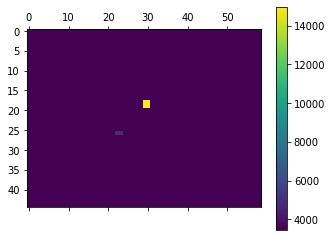

2655 21.59712531890812 135.29843099154667 64.38364844499411


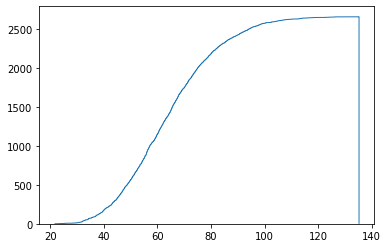

In [7]:
imze.list_highest_peaks(spectra, counter=True)

Let's plot the norm of each spectrum

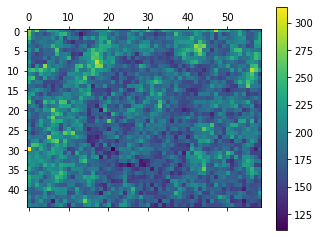

In [14]:
imze.plot_tnc(spectra)

It can be seen that the norm of the spectra differs. However, given that intensities should be comparable, and that there was sample everywhere => just continue

In [15]:
spec = SpectraRegion(spectra, imze.mzValues)

In [16]:
spec.calculate_similarity(mode="spectra_log")

2020-09-26 18:32:38,896  SpectraRegion  INFO: Creating C++ obj
2020-09-26 18:32:38,897  SpectraRegion  INFO: 17900 (45, 59, 17900)
2020-09-26 18:32:38,897  SpectraRegion  INFO: dimensions 17900
2020-09-26 18:32:38,898  SpectraRegion  INFO: input dimensions (45, 59, 17900)
2020-09-26 18:32:38,898  SpectraRegion  INFO: Switching to dot mode
2020-09-26 18:32:38,978  SpectraRegion  INFO: Starting calc similarity c++


17900


2020-09-26 18:33:27,439  SpectraRegion  INFO: outclust dimensions (2655, 2655)
2020-09-26 18:33:27,441  SpectraRegion  INFO: Calculating spectra similarity
2020-09-26 18:33:27,469  SpectraRegion  INFO: Calculating spectra similarity done


array([[1.        , 0.976177  , 0.9691785 , ..., 0.83840215, 0.8406147 ,
        0.8514324 ],
       [0.976177  , 1.        , 0.983427  , ..., 0.88986385, 0.89193237,
        0.9014478 ],
       [0.9691785 , 0.983427  , 0.99999994, ..., 0.9062834 , 0.90395164,
        0.91665274],
       ...,
       [0.83840215, 0.88986385, 0.9062834 , ..., 1.        , 0.95893   ,
        0.9642032 ],
       [0.8406147 , 0.89193237, 0.90395164, ..., 0.95893   , 1.        ,
        0.9649902 ],
       [0.8514324 , 0.9014478 , 0.91665274, ..., 0.9642032 , 0.9649902 ,
        1.        ]], dtype=float32)

In [66]:
spec.segment(method="UMAP_DBSCAN", number_of_regions=15, min_cluster_size=9)

2020-09-26 19:19:38,307  SpectraRegion  INFO: Calculating clusters
2020-09-26 19:19:38,367  SpectraRegion  INFO: UMAP reduction


Elem Matrix (2655, 17900)


2020-09-26 19:20:01,633  SpectraRegion  INFO: HDBSCAN reduction
2020-09-26 19:20:02,078  SpectraRegion  INFO: Cluster Reduction for UMAP Result
2020-09-26 19:20:02,079  SpectraRegion  INFO: Cluster Reduction
2020-09-26 19:20:02,080  SpectraRegion  INFO: Calculating consensus spectra
2020-09-26 19:20:02,118  SpectraRegion  INFO: Calculating consensus spectra done
2020-09-26 19:20:03,525  SpectraRegion  INFO: Calculating clusters done
2020-09-26 19:20:03,566  SpectraRegion  INFO: Calculating clusters saved


array([[2, 2, 2, ..., 3, 3, 3],
       [2, 1, 1, ..., 7, 3, 5],
       [2, 1, 1, ..., 8, 3, 5],
       ...,
       [1, 1, 4, ..., 3, 3, 3],
       [1, 1, 4, ..., 3, 3, 3],
       [1, 4, 4, ..., 3, 3, 3]], dtype=int16)

2020-09-26 19:20:07,186  SpectraRegion  INFO: Pixels    : 2655
2020-09-26 19:20:07,187  SpectraRegion  INFO: Unassigned: 0


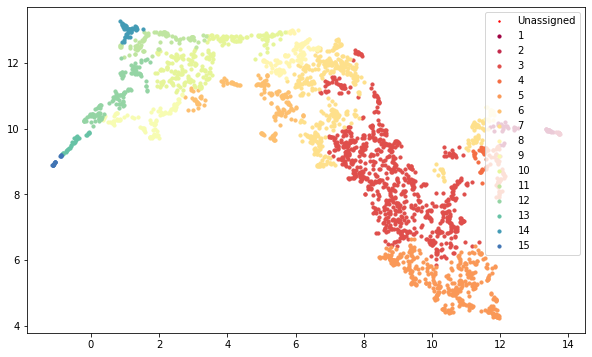

In [67]:
mpl.rcParams['figure.figsize'] = (10,6)
spec.vis_umap(legend=True)
mpl.rcParams['figure.figsize'] = (6,4)

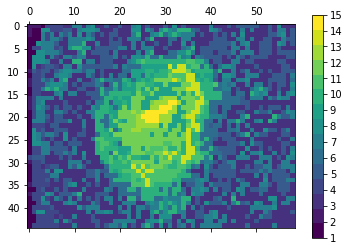

In [68]:
spec.plot_segments()

In [69]:
spec.filter_clusters(method='remove_singleton')
spec.filter_clusters(method='merge_background')
spec.filter_clusters(method='remove_islands')

2020-09-26 19:20:16,779  SpectraRegion  INFO: Assigning clusters to background: {1, 2, 3, 4, 5, 7, 8}


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)

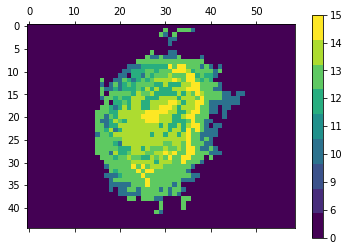

In [70]:
spec.plot_segments()

Which may or may not work well - more robustly, and maybe faster is a classic clustering of the similarity scores:

In [71]:
spec.segment(method="WARD", number_of_regions=15)

2020-09-26 19:20:41,736  SpectraRegion  INFO: Calculating clusters
2020-09-26 19:20:41,894  SpectraRegion  INFO: Calculating clusters done
2020-09-26 19:20:41,913  SpectraRegion  INFO: Calculating clusters saved


array([[7, 7, 7, ..., 2, 2, 4],
       [7, 7, 6, ..., 2, 4, 4],
       [7, 7, 6, ..., 1, 4, 4],
       ...,
       [7, 7, 7, ..., 4, 4, 4],
       [7, 7, 7, ..., 4, 4, 4],
       [7, 7, 6, ..., 4, 4, 4]], dtype=int16)

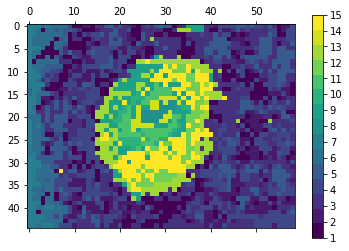

In [72]:
spec.plot_segments()

In [73]:
spec.filter_clusters(method='remove_singleton')
spec.filter_clusters(method='merge_background')
spec.filter_clusters(method='remove_islands')

2020-09-26 19:20:47,685  SpectraRegion  INFO: Assigning clusters to background: {1, 2, 3, 4, 5, 6, 7}


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)

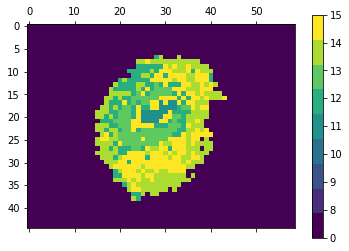

In [74]:
spec.plot_segments()

A manual curation of the segmentation is still possible!

In [75]:
spec.segmented[0:6,] = 0

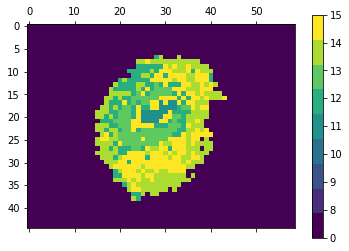

In [76]:
spec.plot_segments()

Consensus Analysis

In [77]:
spec.consensus_spectra()

2020-09-26 19:21:28,491  SpectraRegion  INFO: Calculating consensus spectra
2020-09-26 19:21:28,524  SpectraRegion  INFO: Calculating consensus spectra done


{0: array([0.32858817, 0.32858817, 0.32858817, ..., 0.13814651, 0.13814651,
        0.13814651]),
 9: array([0.31465602, 0.31465602, 0.31465602, ..., 0.1443625 , 0.1443625 ,
        0.1443625 ]),
 13: array([0.27548443, 0.27548443, 0.27548443, ..., 0.15413321, 0.15413321,
        0.15413321]),
 15: array([0.28017098, 0.28017098, 0.28017098, ..., 0.14569722, 0.14569722,
        0.14569722]),
 12: array([0.34919446, 0.34919446, 0.34919446, ..., 0.13358178, 0.13358178,
        0.13358178]),
 11: array([0.48635816, 0.48635816, 0.48635816, ..., 0.12914617, 0.12914617,
        0.12914617]),
 10: array([0.30344266, 0.30344266, 0.30344266, ..., 0.12372944, 0.12372944,
        0.12372944]),
 14: array([0.36963579, 0.36963579, 0.36963579, ..., 0.10479316, 0.10479316,
        0.10479316]),
 8: array([0.4306265 , 0.4306265 , 0.4306265 , ..., 0.11657786, 0.11657786,
        0.11657786])}

In [78]:
spec.consensus_similarity()

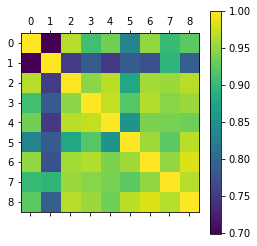

In [79]:
spec.plot_consensus_similarity()

2020-09-26 19:21:33,251  SpectraRegion  INFO: Found clusterLabels [0, 8, 9, 10, 11, 12, 13, 14, 15]
2020-09-26 19:21:33,253  SpectraRegion  INFO: Processing clusterLabel 0
2020-09-26 19:22:40,473  SpectraRegion  INFO: Processing clusterLabel 8
2020-09-26 19:22:40,509  SpectraRegion  INFO: Processing clusterLabel 9
2020-09-26 19:22:40,714  SpectraRegion  INFO: Processing clusterLabel 10
2020-09-26 19:22:40,753  SpectraRegion  INFO: Processing clusterLabel 11
2020-09-26 19:22:40,807  SpectraRegion  INFO: Processing clusterLabel 12
2020-09-26 19:22:40,884  SpectraRegion  INFO: Processing clusterLabel 13
2020-09-26 19:22:41,165  SpectraRegion  INFO: Processing clusterLabel 14
2020-09-26 19:22:41,202  SpectraRegion  INFO: Processing clusterLabel 15


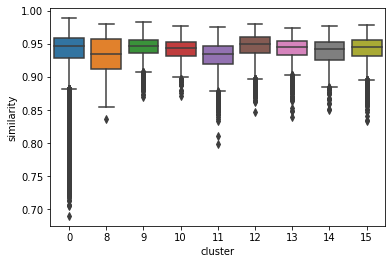

In [80]:
spec.plot_consensus_similarity(mode="spectra")

All clusters hare a 95% similarity in median. Cluster 0 (background) is the most heterogeneous one.

In [ ]:
#spec.plot_inter_consensus_similarity()

# Differential Analysis

One of the stand-alone features of pyIMS is the integration with differential expression analysis. Here several key-features are presented.

First, single masses are looked at:

2020-09-26 19:25:14,716  SpectraRegion  INFO: Processing Mass 14954 with best existing mass 14954.46949644581


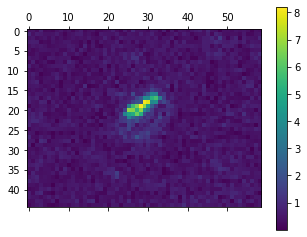

array([[0.38603351, 0.42545078, 0.23931639, ..., 0.11926163, 0.41026431,
        0.32698875],
       [0.90206799, 0.38586802, 0.64947784, ..., 0.20490132, 0.43726457,
        0.49650501],
       [0.44911372, 0.57182538, 0.26431642, ..., 0.44673444, 0.36997257,
        0.88606317],
       ...,
       [0.58414486, 0.45653436, 0.44477605, ..., 0.34979346, 0.55937407,
        0.54758157],
       [0.31066225, 0.34408942, 0.61432496, ..., 0.79788984, 0.34622096,
        0.55357873],
       [0.13089698, 0.38613284, 0.50823977, ..., 0.1421723 , 0.36563074,
        0.53235494]])

In [81]:
spec.mass_heatmap(14954, min_cut_off=0.0025)

The mass with m/z-value 14954 apparently is most active within the aorta structure (center of the image). Is this specific to a specific cluster

2020-09-26 19:25:22,180  SpectraRegion  INFO: Processing Mass 14954 with best existing mass 14954.46949644581


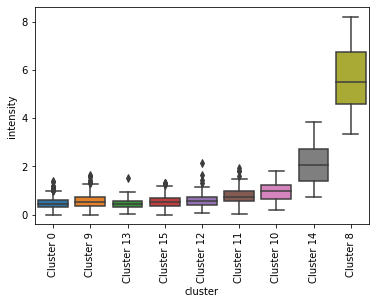

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


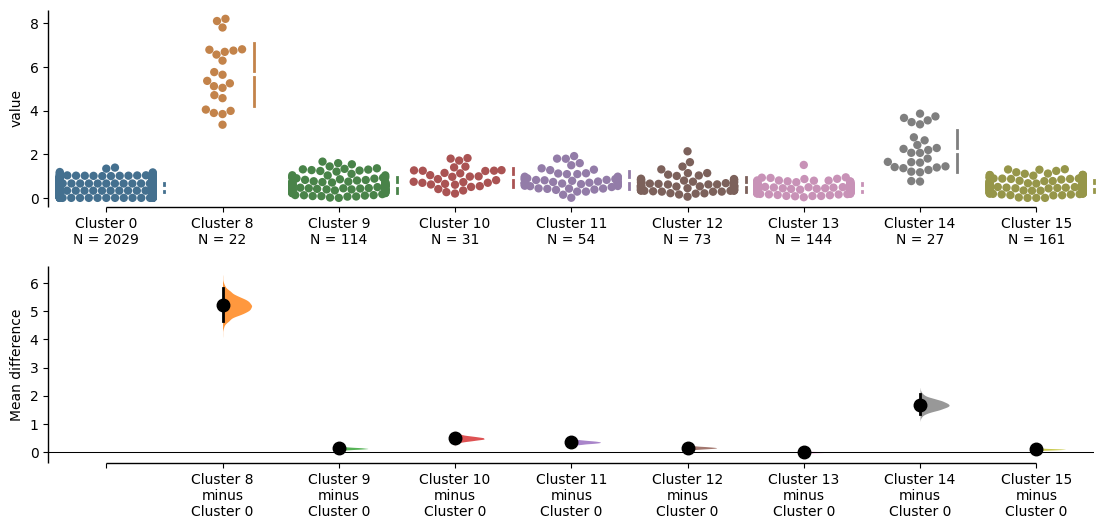

In [82]:
dfobj = spec.mass_dabest(14954)

The DABEST-Plot also clearly reveals that in contrast to the background, cluster 8 intensity values for this mass are quite higher than for all other clusters.

Abviously this mass is most intense in Cluster 8, but also cluster 14. We can now take a look at this mass by setting cluster 14 as reference cluster

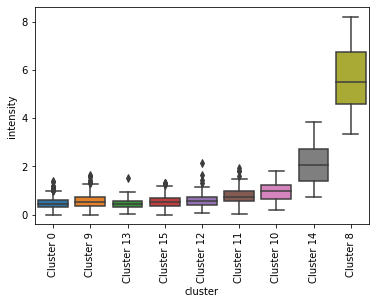

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


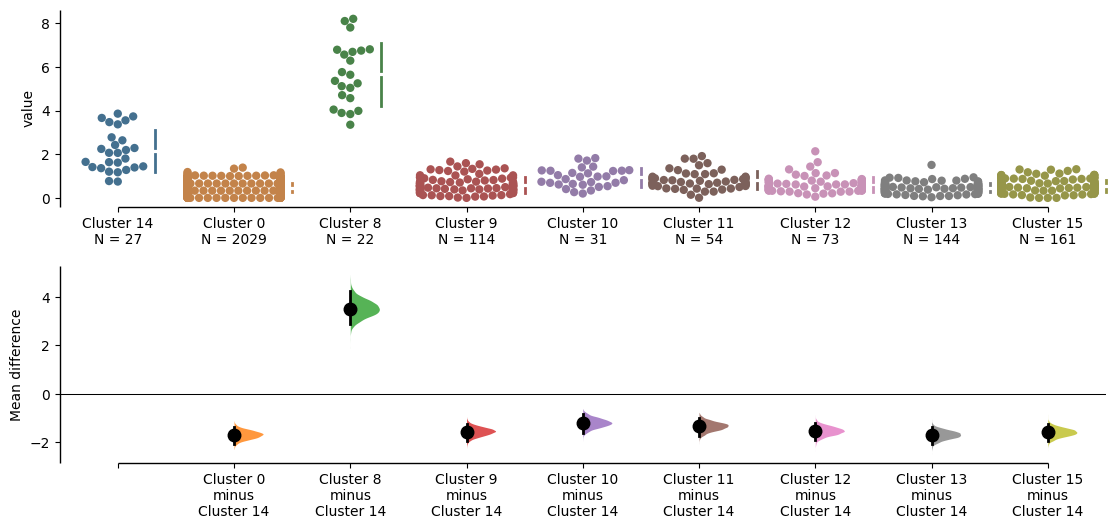

In [84]:
spec.mass_dabest(14954, background=14)

Not knowing where this cluster 8 is, we can highlight it specifically:

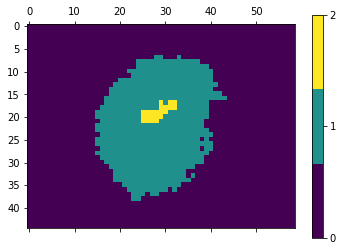

In [86]:
spec.plot_segments(highlight=8)

Or together with cluster 14, where this mass is also prevalent.

On a sidenote: background is set to 0, other regions == 1, and the target region is set to 2

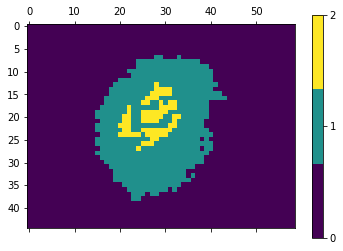

In [87]:
spec.plot_segments(highlight=[8,11])

Just for the sake of clarity: we now remove all differential expression results!

In [91]:
spec.clear_de_results()

## Protein m/z to name

For any combination of sequencing results with these IMS analyses, knowing which protein was measured is of interest.

Using a previously performed LC-MS/MS experiment, which delivers detected proteins together with the masses, allows an easy translation of m/z values to protein name.
This work is done in the ProteinWeights object.

In [93]:
pw = ProteinWeights("protein_weights.tsv")

With the m/z->protein object we can now find all marker masses for the 15 detected regions

For example we can also try to find out, which protein corresponds to mass 14954 ! (it's Ifitm3 ...)

In [111]:
pw.get_protein_from_mass(14954)

[('Ifitm3', 14954.0)]

Marker masses/proteins/genes are genes which are differentially regulated when compared to the specific cluster and all other clusters (including or excluding the background cluster).

Making the distinction regarding the background cluster might be required if the target tissue is embedded in another tissue. Excluding the background might then deliver more sensitive results.

In [94]:
mgenes = spec.find_all_markers(pw, includeBackground=False,
                               replaceExisting=False,
                               outdirectory="./deresults/",
                               use_methods=["ttest", "rank"])

Running [9] against [13, 15, 12, 11, 10, 14, 8]


/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Running [13] against [9, 15, 12, 11, 10, 14, 8]
Running [15] against [9, 13, 12, 11, 10, 14, 8]
Running [12] against [9, 13, 15, 11, 10, 14, 8]
Running [11] against [9, 13, 15, 12, 10, 14, 8]
Running [10] against [9, 13, 15, 12, 11, 14, 8]
Running [14] against [9, 13, 15, 12, 11, 10, 8]
Running [8] against [9, 13, 15, 12, 11, 10, 14]


In [98]:
mgenes["ttest"]

,clusterID,gene_ident,gene_mass,gene,protein_mass,avg_logFC,qvalue,num,anum,mean,median,num_bg,anum_bg,mean_bg,median_bg
0,9,mass_14951_451230019162,14951.451230,Ifitm3,14954.0,-0.554665,0.000045,114,113,0.545910,0.470166,512,510,0.801847,0.530291
1,9,mass_14952_960363232487,14952.960363,Ifitm3,14954.0,-0.568107,0.000037,114,113,0.562549,0.480566,512,510,0.834023,0.539649
2,9,mass_14954_46949644581,14954.469496,Pfn1,14957.0,-0.594910,0.000027,114,113,0.590485,0.529912,512,509,0.891856,0.566239
3,9,mass_14954_46949644581,14954.469496,Ifitm3,14954.0,-0.594910,0.000027,114,113,0.590485,0.529912,512,509,0.891856,0.566239
4,9,mass_14955_978629659136,14955.978630,Pfn1,14957.0,-0.605179,0.000028,114,113,0.636267,0.548758,512,511,0.967868,0.611263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,8,mass_29923_561839409052,29923.561839,Cerk,29922.0,1.004713,0.000030,22,22,0.323135,0.311531,604,577,0.161041,0.158976
503,8,mass_29946_198837608918,29946.198838,Exosc8,29949.0,0.794599,0.001324,22,22,0.263703,0.237707,604,568,0.152026,0.148725
504,8,mass_29947_70797082224,29947.707971,Exosc8,29949.0,0.732237,0.005372,22,22,0.246784,0.242711,604,565,0.148557,0.142739
505,8,mass_29949_217104035568,29949.217104,Exosc8,29949.0,0.664739,0.014730,22,22,0.237411,0.243685,604,569,0.149760,0.141644


In [95]:
mgenes_bg = spec.find_all_markers(pw, includeBackground=True, replaceExisting=False, use_methods = ["ttest", "rank"])

Running [0] against [9, 13, 15, 12, 11, 10, 14, 8]
Running [9] against [0, 13, 15, 12, 11, 10, 14, 8]
Running [13] against [0, 9, 15, 12, 11, 10, 14, 8]
Running [15] against [0, 9, 13, 12, 11, 10, 14, 8]
Running [12] against [0, 9, 13, 15, 11, 10, 14, 8]
Running [11] against [0, 9, 13, 15, 12, 10, 14, 8]
Running [10] against [0, 9, 13, 15, 12, 11, 14, 8]
Running [14] against [0, 9, 13, 15, 12, 11, 10, 8]
Running [8] against [0, 9, 13, 15, 12, 11, 10, 14]


After both find_all_markers runs we can list all DE results, which are then printed.
Each row shows one contained DE results beginning with the test performed and then a tuple of two region/cluster IDs. In the first row here:

a t-test was performed on cluster 9 versus clusters 8,10,11,12,13,14,15 .

In [96]:
spec.list_de_results()

[('ttest', ((9,), (8, 10, 11, 12, 13, 14, 15))),
 ('ttest', ((13,), (8, 9, 10, 11, 12, 14, 15))),
 ('ttest', ((15,), (8, 9, 10, 11, 12, 13, 14))),
 ('ttest', ((12,), (8, 9, 10, 11, 13, 14, 15))),
 ('ttest', ((11,), (8, 9, 10, 12, 13, 14, 15))),
 ('ttest', ((10,), (8, 9, 11, 12, 13, 14, 15))),
 ('ttest', ((14,), (8, 9, 10, 11, 12, 13, 15))),
 ('ttest', ((8,), (9, 10, 11, 12, 13, 14, 15))),
 ('ttest', ((0,), (8, 9, 10, 11, 12, 13, 14, 15))),
 ('ttest', ((9,), (0, 8, 10, 11, 12, 13, 14, 15))),
 ('ttest', ((13,), (0, 8, 9, 10, 11, 12, 14, 15))),
 ('ttest', ((15,), (0, 8, 9, 10, 11, 12, 13, 14))),
 ('ttest', ((12,), (0, 8, 9, 10, 11, 13, 14, 15))),
 ('ttest', ((11,), (0, 8, 9, 10, 12, 13, 14, 15))),
 ('ttest', ((10,), (0, 8, 9, 11, 12, 13, 14, 15))),
 ('ttest', ((14,), (0, 8, 9, 10, 11, 12, 13, 15))),
 ('ttest', ((8,), (0, 9, 10, 11, 12, 13, 14, 15))),
 ('rank', ((9,), (8, 10, 11, 12, 13, 14, 15))),
 ('rank', ((13,), (8, 9, 10, 11, 12, 14, 15))),
 ('rank', ((15,), (8, 9, 10, 11, 12, 13, 14)

It's also easy to save the result to disk:

In [100]:
markerGenes = mgenes["ttest"]
markerGenes.to_csv("deresults/marker_genes.tsv", sep="\t", index=False)

In [101]:
markerGenesBG = mgenes_bg["ttest"]
markerGenesBG.to_csv("deresults/marker_genes_bg.tsv", sep="\t", index=False)

In [102]:
print("Number of unique, differentially detected proteins (from masses): {}".format(len(set(mgenes["ttest"]["gene"]))))

Number of unique, differentially detected proteins (from masses): 239


In [103]:
print("Number of unique, differentially detected proteins (from masses): {}".format(len(set(mgenes_bg["ttest"]["gene"]))))

Number of unique, differentially detected proteins (from masses): 399


In order to save the results, the SpectraRegion object can be pickled:

In [105]:
with open("slideD_region_0.spec.pickle", "wb") as fout:
    pickle.dump(spec, fout)

# Cell-type detection

Cell-type detection requires analyseMarkers.py from https://github.com/mjoppich/scrnaseq_celltype_prediction .

One (obvious) question is: what can I do with those marker proteins? Well, a lot!

First, these are the proteins which you are interested in: these define your clusters, because they are present.

Second, these proteins give a clue about which cell types might be present, if cell-type specific genes were found.

Using the scrnaseq-celltype-prediction tool, this can be analysed! Let's download it first (requires wget, python3 and several other libraries - maybe).
Did you know? This tool achieves better predictions than SingleR :)

Because we know what kind of sample we got (aorta embedded in liver), we can specify organs to specifically check for cell types.
Organs to be considered are "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" "Liver".
This allows a context-specific evaluation!

In [106]:
! wget https://raw.githubusercontent.com/mjoppich/scrnaseq_celltype_prediction/master/analyseMarkers.py

--2020-09-26 22:00:57--  https://raw.githubusercontent.com/mjoppich/scrnaseq_celltype_prediction/master/analyseMarkers.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.112.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.112.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19718 (19K) [text/plain]
Saving to: ‘analyseMarkers.py’

analyseMarkers.py   100%[===================>]  19.26K  --.-KB/s    in 0.03s   

2020-09-26 22:00:57 (736 KB/s) - ‘analyseMarkers.py’ saved [19718/19718]



In [110]:
! python3 analyseMarkers.py --organs "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" "Liver" --pvaladj qvalue --markers deresults/marker_genes.tsv -n 2

Taking value gene from gene
Taking value cluster from clusterID
Taking value logfc from avg_logFC
Taking value pvaladj from qvalue
Taking value expr-mean from mean
Taking value expressing-cell-count from num
Taking value cluster-cell-count from anum
Got 8 clusters.
Starting analysis
Loaded Databases
known genes 43
known (celltype, organ) 58
8	Monocytes;Immune system	1.8150887263987319	1	2	1	1	{'IFITM3'}	{'IFITM3'}
8	Gamma delta T cells;Immune system	0.6368839485167362	1	2	1	1	{'H2AFX'}	{'H2AFX'}
9	Monocytes;Immune system	0.0	1	2	1	1	{'IFITM3'}	{'IFITM3'}
10	Chondrocytes;Connective tissue	0.0	1	1	0	0	set()	{'MIF'}
10	Dendritic cells;Immune system	0.0	1	1	0	0	set()	{'MIF'}
11	Basophils;Immune system	0.0	1	1	0	0	set()	{'IFITM1'}
11	Cardiomyocytes;Heart	0.0	1	2	0	1	set()	{'HAMP'}
12	Hepatocytes;Liver	2.628092467742486	2	5	1	2	{'APOA2'}	{'APOA2', 'TTR'}
12	Adipocytes;Connective tissue	0.11627100695934846	1	3	1	2	{'APOC1'}	{'APOC1'}
13	Hepatic stellate cells;Liver	0.06379678960575423	1	1	0	0

This is quite interesting. For cluster 8 this tool predicts mainly monocytes or gamma delta t cells - cells which do not migrate into other tissues.

This makes sense, because one would expect these cell-types in the inner of the vessel.

H2AFX is known to be upregulated in lymphoblasts (check wikipedia ;) ).
Ifitm3 is highly expressed in both, Liver and Monocytes: https://www.proteinatlas.org/ENSG00000142089-IFITM3/tissue (Consensus dataset)

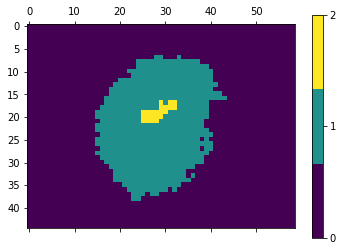

In [112]:
spec.plot_segments(highlight=(8))

In [109]:
! python3 analyseMarkers.py --organs "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" "Liver" --pvaladj qvalue --markers deresults/marker_genes_bg.tsv -n 2

Taking value gene from gene
Taking value cluster from clusterID
Taking value logfc from avg_logFC
Taking value pvaladj from qvalue
Taking value expr-mean from mean
Taking value expressing-cell-count from num
Taking value cluster-cell-count from anum
Got 9 clusters.
Starting analysis
Loaded Databases
known genes 65
known (celltype, organ) 66
0	Hepatocytes;Liver	0.06563401194242277	2	6	1	2	{'APOA2'}	{'HAMP', 'APOA2'}
0	Hepatic stellate cells;Liver	0.0434165347505272	1	2	0	0	set()	{'RBP1'}
8	Hepatocytes;Liver	3.4381264992543246	4	6	1	2	{'APOA2'}	{'HAMP', 'TTR', 'APOA2', 'SAT2'}
8	Gamma delta T cells;Immune system	0.6368839485167362	1	2	1	1	{'H2AFX'}	{'H2AFX'}
9	Cardiomyocytes;Heart	0.0	1	2	0	1	set()	{'HAMP'}
9	Hepatic stellate cells;Liver	0.0	1	2	0	0	set()	{'RBP1'}
10	Monocytes;Immune system	0.7025392421191949	3	4	3	3	{'MGMT', 'RHOC', 'IFITM3'}	{'MGMT', 'RHOC', 'IFITM3'}
10	Mast cells;Immune system	0.6065332694023607	2	2	1	1	{'SOCS2'}	{'PCP4L1', 'SOCS2'}
11	Monocytes;Immune system	0.04265

In this analysis, the background was kept in. More differential genes are found, but also more liver-related cell types are found.

This suggests that the analysis which includes the liver background has influenced the found differential proteins too much.

Nonetheless, the results remain consistent. For cluster 8, the missing monocytes are replaced by hepatocytes, which are monocyte-like cells residing in the liver.

Cluster 9 showing high amounds of cardiomyocytes is also not unlikely, given its location at the outer area of the aorta.

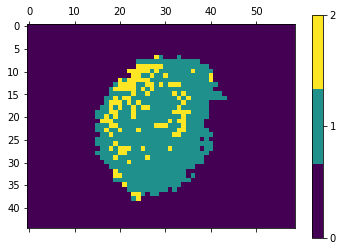

In [113]:
spec.plot_segments(highlight=(9))

Finally the SpectraRegion can also be exported to Aorta3D.

In [115]:
#spec.to_aorta3d("./slided_test/", "slided", 0, protWeights=pw, nodf=False, pathPrefix="../data/test_msi/")

In [ ]:
!ls slided_test

# Preparations for CombinedSpectra - A comparative analysis

In [ ]:
spectra1 = imze.get_region_array(1, makeNullLine=True)
imze.normalize_region_array(spectra1, normalize="vector")
imze.list_highest_peaks(spectra1, counter=True)
print("Got spectra", spectra1.shape)

spec1 = SpectraRegion(spectra1, imze.mzValues)
spec1.calculate_similarity(mode="spectra_log_dist")
spec1.segment(method="WARD", number_of_regions=15)
spec1.plot_segments()

So far the results were only for one IMS sample.

Now the idea is to integrate multiple samples, in order to compare the different samples which were measured on the same slide.

Hence the remaining samples are processed, all in the same fashion. With the inter and intro normalization, the sample are made comparable.

In [116]:
pw = ProteinWeights("protein_weights.tsv")

def process_imzeregion(imze, regionID, basename):
    
    print("Processing regionID", regionID, "for basename", basename)
    
    spectra_orig = imze.get_region_array(regionID, makeNullLine=True)
    spectra_intra = imze.normalize_region_array(spectra_orig, normalize="intra_median")
    spectra = imze.normalize_region_array(spectra_intra, normalize="inter_median")
    
    rspec = SpectraRegion(spectra, imze.mzValues, name=basename + "_" + str(regionID))
    rspec.calculate_similarity(mode="spectra_log_dist")
    rspec.segment(method="WARD", number_of_regions=15)
    rspec.plot_segments()
    
    rspec.filter_clusters(method='remove_singleton')
    rspec.filter_clusters(method='merge_background')
    rspec.filter_clusters(method='remove_islands')
    rspec.plot_segments()
    
    rspec.consensus_spectra()
    rspec.consensus_similarity()
    rspec.plot_consensus_similarity()
    
    mgenes = rspec.find_all_markers(pw, includeBackground=False, replaceExisting=False, use_methods = ["ttest", "rank"])
    mgenes_bg = rspec.find_all_markers(pw, includeBackground=True, replaceExisting=False, use_methods = ["ttest", "rank"])
    
    return rspec, mgenes, mgenes_bg
    

First set the logging level to warn, to remove too many messages ...

In [118]:
import logging
loggers = [logging.getLogger(name) for name in logging.root.manager.loggerDict]
for logger in loggers:
    logger.setLevel(logging.WARN)

Processing regionID 0 for basename slideD
17900


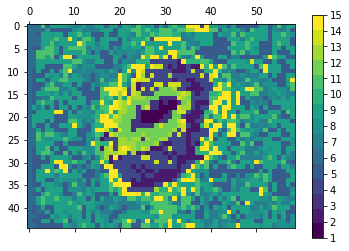

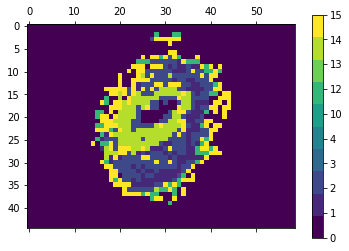

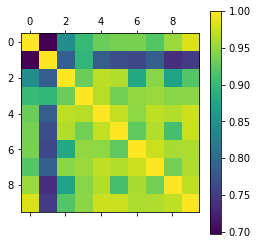

Running [10] against [4, 15, 2, 14, 13, 12, 3, 1]


/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Running [4] against [10, 15, 2, 14, 13, 12, 3, 1]
Running [15] against [10, 4, 2, 14, 13, 12, 3, 1]
Running [2] against [10, 4, 15, 14, 13, 12, 3, 1]
Running [14] against [10, 4, 15, 2, 13, 12, 3, 1]
Running [13] against [10, 4, 15, 2, 14, 12, 3, 1]
Running [12] against [10, 4, 15, 2, 14, 13, 3, 1]
Running [3] against [10, 4, 15, 2, 14, 13, 12, 1]
Running [1] against [10, 4, 15, 2, 14, 13, 12, 3]
Running [0] against [10, 4, 15, 2, 14, 13, 12, 3, 1]
Running [10] against [0, 4, 15, 2, 14, 13, 12, 3, 1]
Running [4] against [0, 10, 15, 2, 14, 13, 12, 3, 1]
Running [15] against [0, 10, 4, 2, 14, 13, 12, 3, 1]
Running [2] against [0, 10, 4, 15, 14, 13, 12, 3, 1]
Running [14] against [0, 10, 4, 15, 2, 13, 12, 3, 1]
Running [13] against [0, 10, 4, 15, 2, 14, 12, 3, 1]
Running [12] against [0, 10, 4, 15, 2, 14, 13, 3, 1]
Running [3] against [0, 10, 4, 15, 2, 14, 13, 12, 1]
Running [1] against [0, 10, 4, 15, 2, 14, 13, 12, 3]
Processing regionID 1 for basename slideD
17900


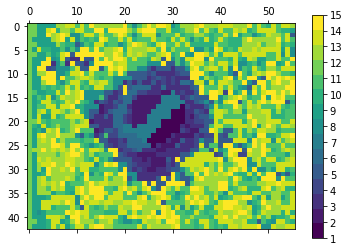

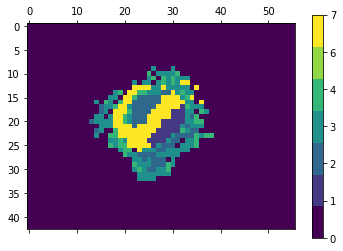

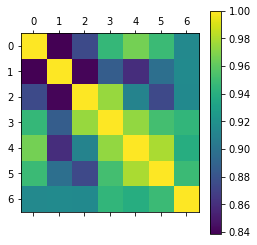

Running [3] against [4, 6, 2, 7, 1]
Running [4] against [3, 6, 2, 7, 1]
Running [6] against [3, 4, 2, 7, 1]
Running [2] against [3, 4, 6, 7, 1]
Running [7] against [3, 4, 6, 2, 1]
Running [1] against [3, 4, 6, 2, 7]
Running [0] against [3, 4, 6, 2, 7, 1]
Running [3] against [0, 4, 6, 2, 7, 1]
Running [4] against [0, 3, 6, 2, 7, 1]
Running [6] against [0, 3, 4, 2, 7, 1]
Running [2] against [0, 3, 4, 6, 7, 1]
Running [7] against [0, 3, 4, 6, 2, 1]
Running [1] against [0, 3, 4, 6, 2, 7]


In [119]:
slided_0, slided0_mgenes, slided0_mgenes_bg = process_imzeregion(imze=imze, regionID= 0, basename="slideD")
slided_1, slided1_mgenes, slided1_mgenes_bg = process_imzeregion(imze=imze, regionID= 1, basename="slideD")

Processing regionID 4 for basename slideD


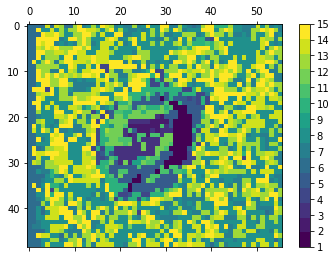

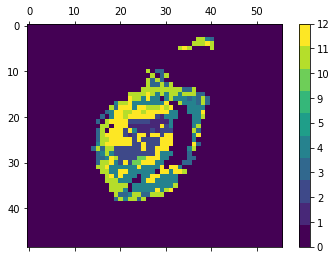

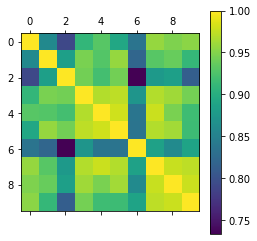

Processing regionID 5 for basename slideD


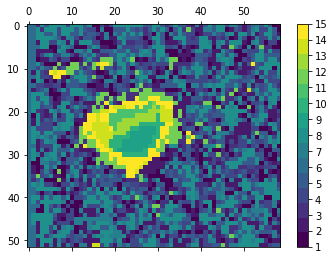

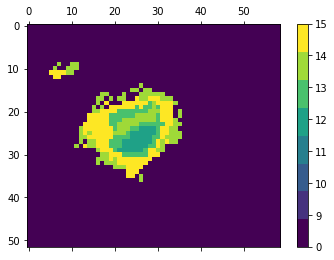

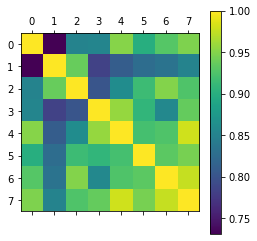

In [120]:
slided_4, slided4_mgenes, slided4_mgenes_bg = process_imzeregion(imze=imze, regionID= 4, basename="slideD")
slided_5, slided5_mgenes, slided5_mgenes_bg = process_imzeregion(imze=imze, regionID= 5, basename="slideD")

In [182]:
loggers = [logging.getLogger(name) for name in logging.root.manager.loggerDict]
for logger in loggers:
    logger.setLevel(logging.INFO)

In [121]:
markerGenes0 = slided0_mgenes["ttest"]
markerGenes0.to_csv("deresults/marker_genes_region_0.tsv", sep="\t", index=False)
markerGenes1 = slided1_mgenes["ttest"]
markerGenes1.to_csv("deresults/marker_genes_region_1.tsv", sep="\t", index=False)
markerGenes4 = slided4_mgenes["ttest"]
markerGenes4.to_csv("deresults/marker_genes_region_4.tsv", sep="\t", index=False)
markerGenes5 = slided5_mgenes["ttest"]
markerGenes5.to_csv("deresults/marker_genes_region_5.tsv", sep="\t", index=False)


In [122]:
! python3 analyseMarkers.py --organs "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" "Liver" --pvaladj qvalue --markers deresults/marker_genes_region_0.tsv -n 2

Taking value gene from gene
Taking value cluster from clusterID
Taking value logfc from avg_logFC
Taking value pvaladj from qvalue
Taking value expr-mean from mean
Taking value expressing-cell-count from num
Taking value cluster-cell-count from anum
Got 9 clusters.
Starting analysis
Loaded Databases
known genes 36
known (celltype, organ) 45
1	Monocytes;Immune system	3.6301774527974637	1	1	1	1	{'IFITM3'}	{'IFITM3'}
1	Gamma delta T cells;Immune system	1.2737678970334725	1	1	1	1	{'H2AFX'}	{'H2AFX'}
2	Adipocytes;Connective tissue	0.11301558163818848	1	3	1	2	{'APOC1'}	{'APOC1'}
2	Mast cells;Immune system	0.0	1	1	0	0	set()	{'PCP4L1'}
3	Monocytes;Immune system	1.3515456118525349	1	1	1	1	{'IFITM3'}	{'IFITM3'}
3	Mast cells;Immune system	0.044820199926694025	1	1	0	0	set()	{'PCP4L1'}
4	Mast cells;Immune system	0.0	1	1	0	0	set()	{'PCP4L1'}
4	Monocytes;Immune system	0.0	1	1	1	1	{'IFITM3'}	{'IFITM3'}
10	Hepatic stellate cells;Liver	0.07500533186689014	1	1	0	0	set()	{'RBP1'}
10	Cardiomyocytes;Heart	0

In [123]:
! python3 analyseMarkers.py --organs "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" "Liver" --pvaladj qvalue --markers deresults/marker_genes_region_1.tsv -n 2

Taking value gene from gene
Taking value cluster from clusterID
Taking value logfc from avg_logFC
Taking value pvaladj from qvalue
Taking value expr-mean from mean
Taking value expressing-cell-count from num
Taking value cluster-cell-count from anum
Got 6 clusters.
Starting analysis
Loaded Databases
known genes 20
known (celltype, organ) 30
1	Hepatic stellate cells;Liver	0.0	1	2	0	0	set()	{'MYL9'}
1	Hepatocytes;Liver	0.0	1	1	1	1	{'APOA2'}	{'APOA2'}
2	Hepatocytes;Liver	16.954489948292466	1	1	1	1	{'APOA2'}	{'APOA2'}
2	Megakaryocytes;Immune system	0.15148105413808366	1	1	0	0	set()	{'PF4'}
6	Plasma cells;Immune system	0.2533926950225903	1	1	1	1	{'CYCS'}	{'CYCS'}
6	Gamma delta T cells;Immune system	0.0	1	2	1	2	{'H2AFX'}	{'H2AFX'}
7	Hepatic stellate cells;Liver	0.0	1	2	0	0	set()	{'RBP1'}


In [124]:
! python3 analyseMarkers.py --organs "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" "Liver" --pvaladj qvalue --markers deresults/marker_genes_region_4.tsv -n 2

Taking value gene from gene
Taking value cluster from clusterID
Taking value logfc from avg_logFC
Taking value pvaladj from qvalue
Taking value expr-mean from mean
Taking value expressing-cell-count from num
Taking value cluster-cell-count from anum
Got 9 clusters.
Starting analysis
Loaded Databases
known genes 34
known (celltype, organ) 44
1	Cardiomyocytes;Heart	0.0	1	1	0	0	set()	{'HAMP'}
1	Hepatic stellate cells;Liver	0.0	1	2	0	0	set()	{'RBP1'}
2	Hepatocytes;Liver	20.605262240196694	2	2	1	1	{'APOA2'}	{'APOA2', 'HAMP'}
2	Monocytes;Immune system	2.4045710962165856	1	1	1	1	{'IFITM3'}	{'IFITM3'}
3	Monocytes;Immune system	1.1810939193607248	1	1	1	1	{'IFITM3'}	{'IFITM3'}
3	Mast cells;Immune system	0.04662995514832864	1	1	0	0	set()	{'PCP4L1'}
4	Hepatic stellate cells;Liver	0.05345048618594034	1	2	0	0	set()	{'RBP1'}
4	Smooth muscle cells;Smooth muscle	0.04221446027644195	2	2	0	0	set()	{'PCP4L1', 'SNCG'}
9	Platelets;Blood	0.0	1	4	1	3	{'RAP1B'}	{'RAP1B'}
10	Cardiomyocytes;Heart	0.0364045816909

In [125]:
! python3 analyseMarkers.py --organs "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" "Liver" --pvaladj qvalue --markers deresults/marker_genes_region_5.tsv -n 2

Taking value gene from gene
Taking value cluster from clusterID
Taking value logfc from avg_logFC
Taking value pvaladj from qvalue
Taking value expr-mean from mean
Taking value expressing-cell-count from num
Taking value cluster-cell-count from anum
Got 7 clusters.
Starting analysis
Loaded Databases
known genes 45
known (celltype, organ) 56
9	Endothelial cells;Vasculature	0.7610114717344278	2	3	1	1	{'S100A13'}	{'GNG11', 'S100A13'}
9	Erythroid-like and erythroid precursor cells;Blood	0.5173376590166222	1	2	1	1	{'SNCA'}	{'SNCA'}
10	Gamma delta T cells;Immune system	0.0	1	3	1	1	{'H2AFX'}	{'H2AFX'}
10	Hepatocytes;Liver	0.0	1	3	1	1	{'APOA2'}	{'APOA2'}
11	Hepatocytes;Liver	19.913952349148435	2	3	1	1	{'APOA2'}	{'HAMP', 'APOA2'}
11	Platelets;Blood	0.1220396579175191	1	2	0	0	set()	{'PF4'}
12	Monocytes;Immune system	0.32608714902787966	1	2	1	1	{'IFITM3'}	{'IFITM3'}
12	Hepatic stellate cells;Liver	0.16465718862525203	1	1	0	0	set()	{'RBP1'}
13	Adipocytes;Connective tissue	0.7707135261322664	1	2	1	

From these cell type predictions it can be seen that mostly atherosclerosis relates cell types are showing up.

# Creating a CombinedSpectra

In [126]:
slided_0.name = "slided_0"
slided_1.name = "slided_1"
slided_4.name = "slided_4"
slided_5.name = "slided_5"

In [131]:
slided_0.to_pickle("deresults/slideD_region_0.pickle")
slided_1.to_pickle("deresults/slideD_region_1.pickle")

In [135]:
#slided_4.to_pickle("deresults/slideD_region_4.pickle")
#slided_5.to_pickle("deresults/slideD_region_5.pickle")

In [136]:
#slided_0 = SpectraRegion.from_pickle("slideD_region_0.pickle")
#slided_1 = SpectraRegion.from_pickle("slideD_region_1.pickle")
#slided_4 = SpectraRegion.from_pickle("slideD_region_4.pickle")
#slided_5 = SpectraRegion.from_pickle("slideD_region_5pickle")

Here a CombinedSpectra is creates. This class allows to compare multiple SpectraRegions

In [137]:
combSpec = CombinedSpectra({0: slided_0, 1: slided_1, 4: slided_4, 5: slided_5})

The consensus_smilarity() function calculates the similarity between all the contained spectra's regions using the average cluster/region spectra.

In [138]:
combSpec.consensus_similarity()

In [139]:
combSpec.consensus_similarity_matrix

,"(slided_0, 0)","(slided_0, 1)","(slided_0, 2)","(slided_0, 3)","(slided_0, 4)","(slided_0, 10)","(slided_0, 12)","(slided_0, 13)","(slided_0, 14)","(slided_0, 15)",...,"(slided_4, 11)","(slided_4, 12)","(slided_5, 0)","(slided_5, 9)","(slided_5, 10)","(slided_5, 11)","(slided_5, 12)","(slided_5, 13)","(slided_5, 14)","(slided_5, 15)"
"(slided_0, 0)",1.000000,0.696928,0.847131,0.902106,0.931425,0.938048,0.938620,0.919873,0.954715,0.983920,...,0.936295,0.945066,0.971816,0.690660,0.824152,0.801435,0.900357,0.863128,0.900345,0.907313
"(slided_0, 1)",0.696928,1.000000,0.787342,0.895964,0.785877,0.769330,0.762611,0.788647,0.738089,0.750532,...,0.788810,0.740944,0.727190,0.595455,0.643432,0.774120,0.776559,0.720369,0.709558,0.762815
"(slided_0, 2)",0.847131,0.787342,1.000000,0.930215,0.969402,0.965591,0.879460,0.945562,0.872727,0.918930,...,0.936262,0.873617,0.883858,0.765272,0.795761,0.980335,0.966372,0.883847,0.862546,0.942794
"(slided_0, 3)",0.902106,0.895964,0.930215,1.000000,0.967534,0.935983,0.950494,0.954108,0.945553,0.947457,...,0.973911,0.943804,0.923001,0.725563,0.832812,0.913849,0.934804,0.916508,0.910617,0.943655
"(slided_0, 4)",0.931425,0.785877,0.969402,0.967534,1.000000,0.971985,0.948262,0.970640,0.964872,0.976654,...,0.989643,0.950140,0.949596,0.743274,0.838985,0.939626,0.963044,0.913938,0.919684,0.964636
"(slided_0, 10)",0.938048,0.769330,0.965591,0.935983,0.971985,1.000000,0.926012,0.965179,0.911024,0.975670,...,0.951016,0.923277,0.955534,0.783838,0.842087,0.940121,0.985747,0.905867,0.908316,0.963328
"(slided_0, 12)",0.938620,0.762611,0.879460,0.950494,0.948262,0.926012,1.000000,0.975322,0.961582,0.963140,...,0.973166,0.993972,0.941423,0.792238,0.922675,0.859961,0.920231,0.940018,0.975649,0.961614
"(slided_0, 13)",0.919873,0.788647,0.945562,0.954108,0.970640,0.965179,0.975322,1.000000,0.936672,0.964428,...,0.973934,0.967985,0.932452,0.820998,0.902421,0.926409,0.963015,0.923696,0.961080,0.981501
"(slided_0, 14)",0.954715,0.738089,0.872727,0.945553,0.964872,0.911024,0.961582,0.936672,1.000000,0.971369,...,0.982181,0.972173,0.953892,0.674366,0.835320,0.835277,0.895978,0.886581,0.926847,0.928068
"(slided_0, 15)",0.983920,0.750532,0.918930,0.947457,0.976654,0.975670,0.963140,0.964428,0.971369,1.000000,...,0.976557,0.967958,0.984249,0.742132,0.858949,0.883136,0.955464,0.908493,0.937242,0.959424


Since the inspection of this matrix becomes tidious, particularly if large, it an be plotted :)

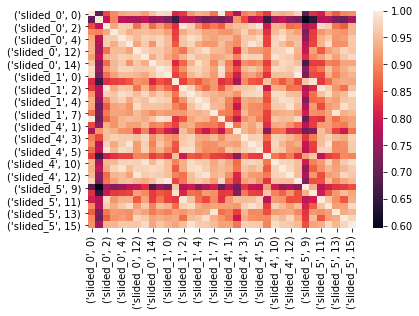

In [140]:
combSpec.plot_consensus_similarity()

It can already be seen that some classes are more similar to each other, than others.

Now the single slide/region clusters are reclustered.

/usr/local/lib/python3.8/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


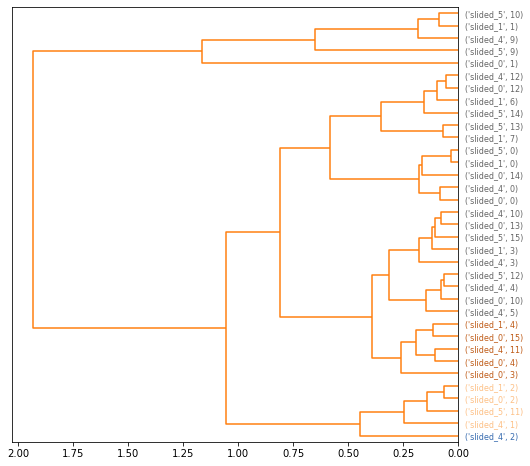

In [141]:
combSpec.cluster_concensus_spectra(number_of_clusters=10)

A detailed print out of the newly assigned cluster for each slide, region.

In [142]:
combSpec.region_cluster2cluster

{('slided_0', 0): 5,
 ('slided_0', 1): 10,
 ('slided_0', 2): 1,
 ('slided_0', 3): 3,
 ('slided_0', 4): 3,
 ('slided_0', 10): 4,
 ('slided_0', 12): 7,
 ('slided_0', 13): 4,
 ('slided_0', 14): 5,
 ('slided_0', 15): 3,
 ('slided_1', 0): 5,
 ('slided_1', 1): 8,
 ('slided_1', 2): 1,
 ('slided_1', 3): 4,
 ('slided_1', 4): 3,
 ('slided_1', 6): 7,
 ('slided_1', 7): 6,
 ('slided_4', 0): 5,
 ('slided_4', 1): 1,
 ('slided_4', 2): 2,
 ('slided_4', 3): 4,
 ('slided_4', 4): 4,
 ('slided_4', 5): 4,
 ('slided_4', 9): 8,
 ('slided_4', 10): 4,
 ('slided_4', 11): 3,
 ('slided_4', 12): 7,
 ('slided_5', 0): 5,
 ('slided_5', 9): 9,
 ('slided_5', 10): 8,
 ('slided_5', 11): 1,
 ('slided_5', 12): 4,
 ('slided_5', 13): 6,
 ('slided_5', 14): 7,
 ('slided_5', 15): 4}

The new assignment can also be plotted:

{1.0: 1, 2.0: 2, 3.0: 3, 4.0: 4, 5.0: 5, 6.0: 6, 7.0: 7, 8.0: 8, 9.0: 9, 10.0: 10}
{0: 5, 1: 10, 2: 1, 3: 3, 4: 3, 10: 4, 12: 7, 13: 4, 14: 5, 15: 3}
{0: 5, 1: 8, 2: 1, 3: 4, 4: 3, 6: 7, 7: 6}
{0: 5, 1: 1, 2: 2, 3: 4, 4: 4, 5: 4, 9: 8, 10: 4, 11: 3, 12: 7}
{0: 5, 9: 9, 10: 8, 11: 1, 12: 4, 13: 6, 14: 7, 15: 4}


../src/pySRM/pysrm/comparative.py:222: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  ax.cax.colorbar(im,ticks=positions, format=formatter, spacing='proportional')
/usr/local/lib/python3.8/dist-packages/mpl_toolkits/axes_grid1/axes_grid.py:51: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid1.colorbar module was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use matplotlib.colorbar instead.
  from .colorbar import Colorbar


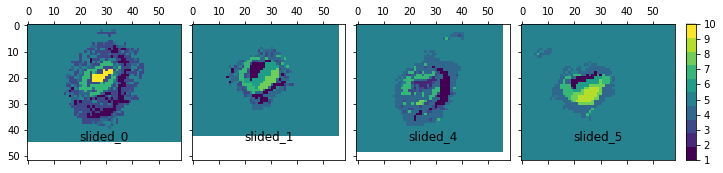

In [143]:
combSpec.plot_common_segments()

And of course, interpreted.

Slide 1 and Slide 5 appear to be similar, and slide 0 and slide 4.



{0: 5, 1: 10, 2: 1, 3: 3, 4: 3, 10: 4, 12: 7, 13: 4, 14: 5, 15: 3}
{0: 5, 1: 8, 2: 1, 3: 4, 4: 3, 6: 7, 7: 6}
{0: 5, 1: 1, 2: 2, 3: 4, 4: 4, 5: 4, 9: 8, 10: 4, 11: 3, 12: 7}
{0: 5, 9: 9, 10: 8, 11: 1, 12: 4, 13: 6, 14: 7, 15: 4}
{1.0: 1.0, 2.0: 2.0}


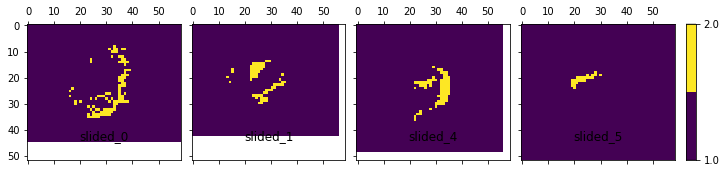

In [156]:
combSpec.plot_common_segments(highlight=(1,2))

Similar to a normal SpectraRegion, also specific masses can be plotted. Here we can see that mass 14954 is not present in slides 1 and 5!

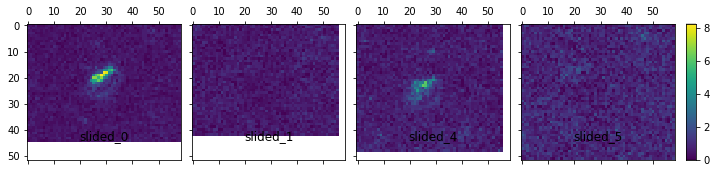

In [171]:
_ = combSpec.mass_heatmap(14954)

Slide 0 cluster 2 and slide 4 cluster 1 seem to be very similar. We now want to see whether some differences can be observed.

For this, we suspect that slides 0 and 4 are disease-samples, and slides 1 and 5 are controls.

We now compare the outer regions of both samples:

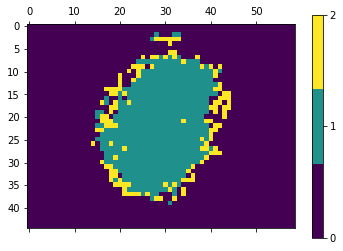

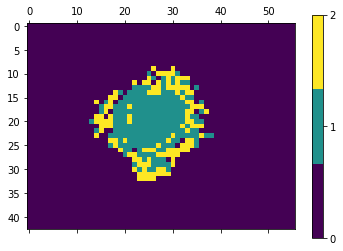

In [218]:
combSpec.regions["slided_0"].plot_segments(highlight=[15])
combSpec.regions["slided_1"].plot_segments(highlight=3)

In [219]:
resdf_0_15__1_3, expr, pdata = combSpec.find_markers("slided_0", [15], "slided_1", [3], pw)

Running slided_0 [15] against slided_1 [3]


In [221]:
mydf = resdf_0_15__1_3["ttest"][('slided_0', (15,), 'slided_1', (3,))]

In [246]:
mydf[myd == "Pin4"]

,clusterID,gene_ident,gene_mass,gene,protein_mass,avg_logFC,qvalue,num,anum,mean,median,num_bg,anum_bg,mean_bg,median_bg
345,slided_0,mass_13812_055653959353,13812.055654,Pin4,13815.0,0.927188,3.646611e-50,129,129,3.420178,3.482125,122,122,6.503696,6.425078
347,slided_0,mass_13813_564787172678,13813.564787,Pin4,13815.0,0.908973,2.821046e-49,129,129,3.222833,3.250499,122,122,6.051540,6.014484
349,slided_0,mass_13815_073920386001,13815.073920,Pin4,13815.0,0.884804,1.343858e-47,129,129,3.057905,3.138249,122,122,5.646467,5.633793
350,slided_0,mass_13816_583053599326,13816.583054,Pin4,13815.0,0.863448,5.012127e-46,129,129,2.908131,3.019316,122,122,5.291000,5.288376


In [193]:
from adjustText import adjust_text

In [271]:
trhsld = 2
plotDF = mydf[((mydf["median"] > trhsld) | (mydf["median_bg"] > trhsld))]

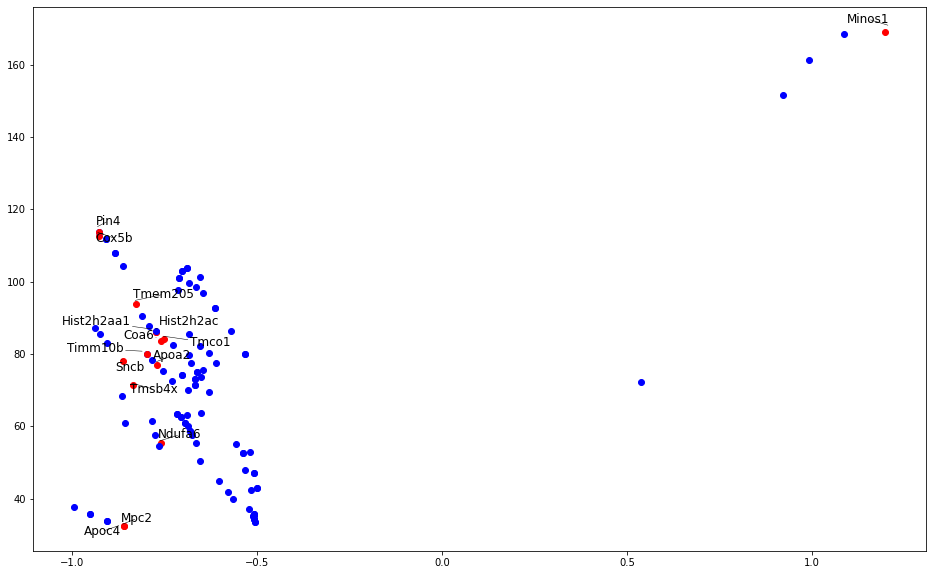

In [272]:
plt.figure(figsize=(16,10))
xydots = [(x,y) for x,y in zip(list(-plotDF["avg_logFC"]), list(-np.log(plotDF["qvalue"])))]
dotgene = list(plotDF["gene"])
texts = []
seenProts = set()

for i in range(len(xydots)):
    x = xydots[i][0]
    y = xydots[i][1]
    
    if not dotgene[i] in seenProts and abs(y) >= 20 and abs(x) >= 0.75:
        texts.append(plt.text(x * (1 + 0.01), y * (1 + 0.01) , dotgene[i], fontsize=12))
        plt.plot(x, y, 'ro')
        seenProts.add(dotgene[i])
    else:
        plt.plot(x, y, 'bo')

adjust_text(texts, force_points=0.2, force_text=0.2, expand_points=(1, 1), expand_text=(1, 1), arrowprops=dict(arrowstyle="-", color='black', lw=0.5))
plt.show()

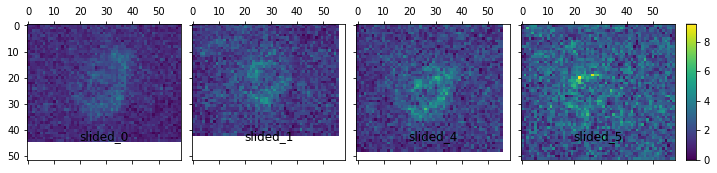

In [273]:
_ = combSpec.mass_heatmap(pw.protein2mass.get("Tmsb4x"))

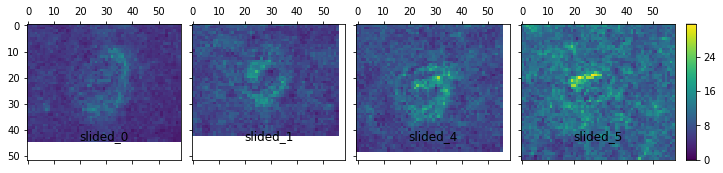

In [275]:
_ = combSpec.mass_heatmap(pw.protein2mass.get("Timm10b"))

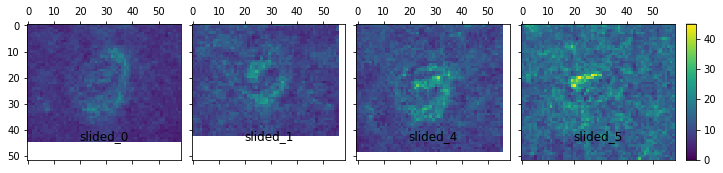

In [276]:
_ = combSpec.mass_heatmap(pw.protein2mass.get("Apoa2"))

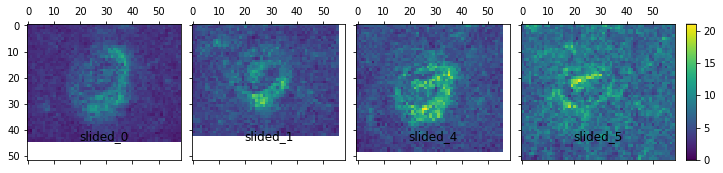

In [277]:
_ = combSpec.mass_heatmap(pw.protein2mass.get("Sncb"))